CSE4214 Pattern Recognition Lab

Experiment No 5

Implementing K-Means Clustering

ID : 170204048

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1(i). Taking input from the given source data file:

In [220]:
dataset = pd.read_csv('data_k_mean.txt',header = None,delimiter = ' ')

In [221]:
dataset

,0,1
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


In [222]:
x = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

 1(ii). Plotting all the points:

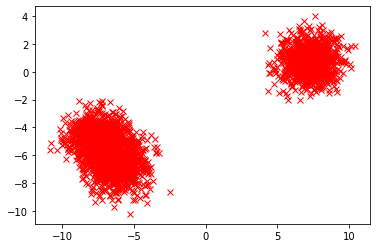

In [223]:
for i in range (0,dataset.shape[0]):
  plt.plot(x[i], y[i], 'x',color='red')

Taking the value of k as input

In [224]:
print("Enter the value of k")
k = int(input())

Enter the value of k
2


In [225]:
centroid = np.empty((k, 2), float)
import random
for m in range(k):
  centroid[m][0]= np.random.choice(x)
  centroid[m][1]= np.random.choice(y)

2. Performing the k-means clustering algorithm applying Euclidean distance as a distance measure on the given dataset:

In [226]:
temp = np.empty((dataset.shape[0], k), float)
distance = np.empty((dataset.shape[0], k), float)
cluster = []
tempcluster = []

while(1):
  for i in range(dataset.shape[0]):
    for j in range(k):
      temp[i][j] = pow( (pow((x[i] - centroid[j][0]),2) + pow((y[i] - centroid[j][1]),2)) , 1/2 )
      distance[i][j] = temp[i][j]
  cluster.clear()
  min = np.amin(distance, axis = 1)
  
  for m in range(dataset.shape[0]):
    for n in range(k):
      if distance[m][n] == min[m]:
        cluster.append(n)
  
  if tempcluster == cluster:
    break;
  
  if tempcluster != cluster:
    Xcnt = np.empty((0))
    for i in range(k):
      Xcnt = np.append(Xcnt, i)
    Ycnt = np.empty((0))
    for i in range(k):
      Ycnt = np.append(Ycnt, i)
    cnt = np.empty((0))
    for i in range(k):
      cnt = np.append(cnt, i)
    
    for i in range(dataset.shape[0]):
      for j in range(k):
        if cluster[i] == j:
          Xcnt[j] += x[i]
          Ycnt[j] += y[i]
          cnt[j] += cnt[j]
      centroid[j][0] = (Xcnt[j]/cnt[j])
      centroid[j][1] = (Ycnt[j]/cnt[j])
    tempcluster.clear()
    tempcluster = cluster.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars


3. Coloring the corresponding points on the clusters with different colors:

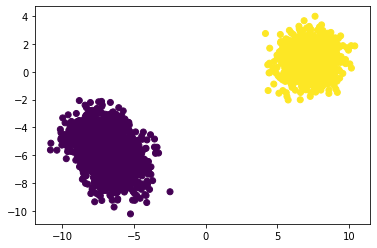

In [227]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y, c=cluster)
plt.show()